In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
!pip install missingno

In [3]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [4]:
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
train_df_copy = train_df.copy()

In [5]:
train_df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
725,726,0,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,NaN,S
307,308,1,1,"Penasco y Castellana, Mrs. Victor de Satode (M...",female,17.0,1,0,PC 17758,108.9000,C65,C
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
826,827,0,3,"Lam, Mr. Len",male,NaN,0,0,1601,56.4958,NaN,S
751,752,1,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S


In [6]:
test_df.sample(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
88,980,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.7500,NaN,Q
311,1203,3,"Vartanian, Mr. David",male,22.0,0,0,2658,7.2250,NaN,C
148,1040,1,"Crafton, Mr. John Bertram",male,NaN,0,0,113791,26.5500,NaN,S
261,1153,3,"Nilsson, Mr. August Ferdinand",male,21.0,0,0,350410,7.8542,NaN,S
43,935,2,"Corbett, Mrs. Walter H (Irene Colvin)",female,30.0,0,0,237249,13.0000,NaN,S


In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Dealing with missing data

In [9]:
# investigating missing data
(train_df.isnull().sum()*100)/len(train_df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: >

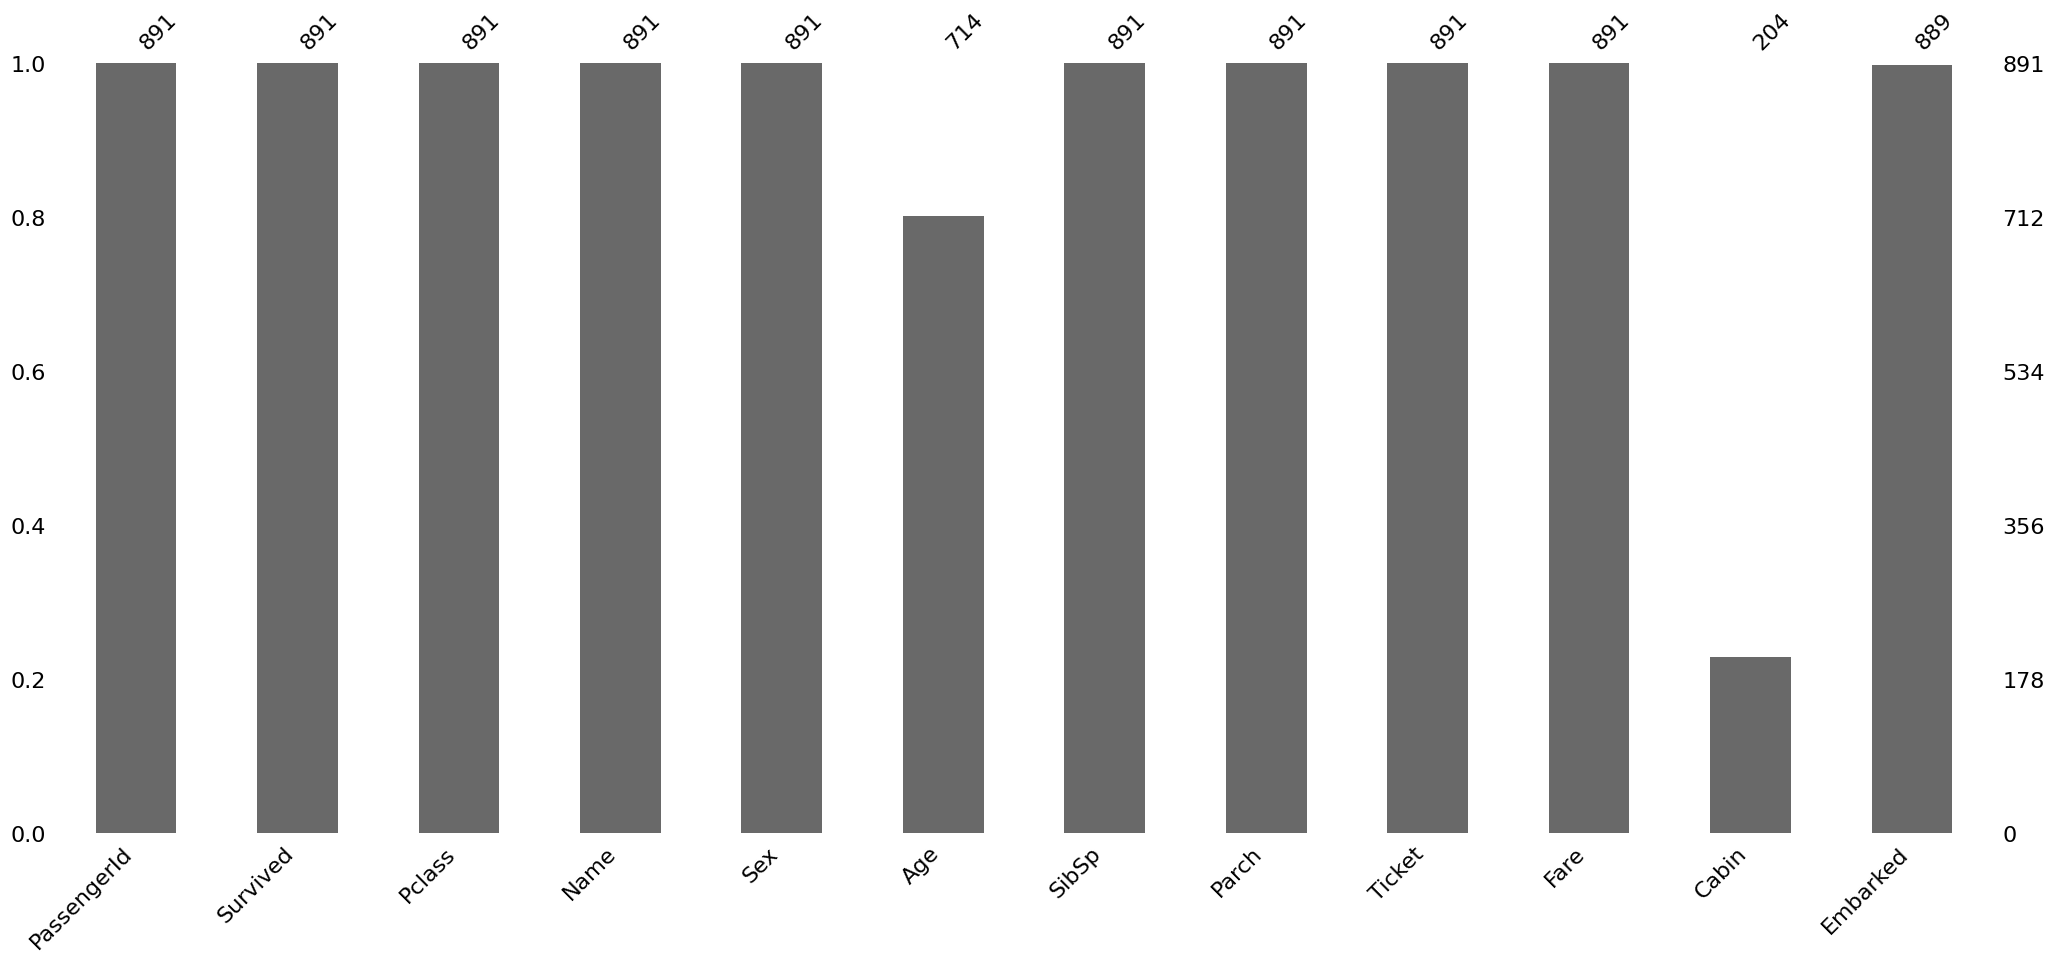

In [10]:
import missingno as msno

msno.bar(train_df)

In [11]:
# dropping the cabin column because too many missing data
train_df = train_df.drop(columns=['Cabin'])

In [12]:
# replace NaN values with the most frequent value 'S'
train_df['Embarked'].fillna('S', inplace=True)

In [13]:
# replace NaN values with column mean
train_df['Age'].fillna(train_df['Age'].mean(), inplace=True)

<Axes: >

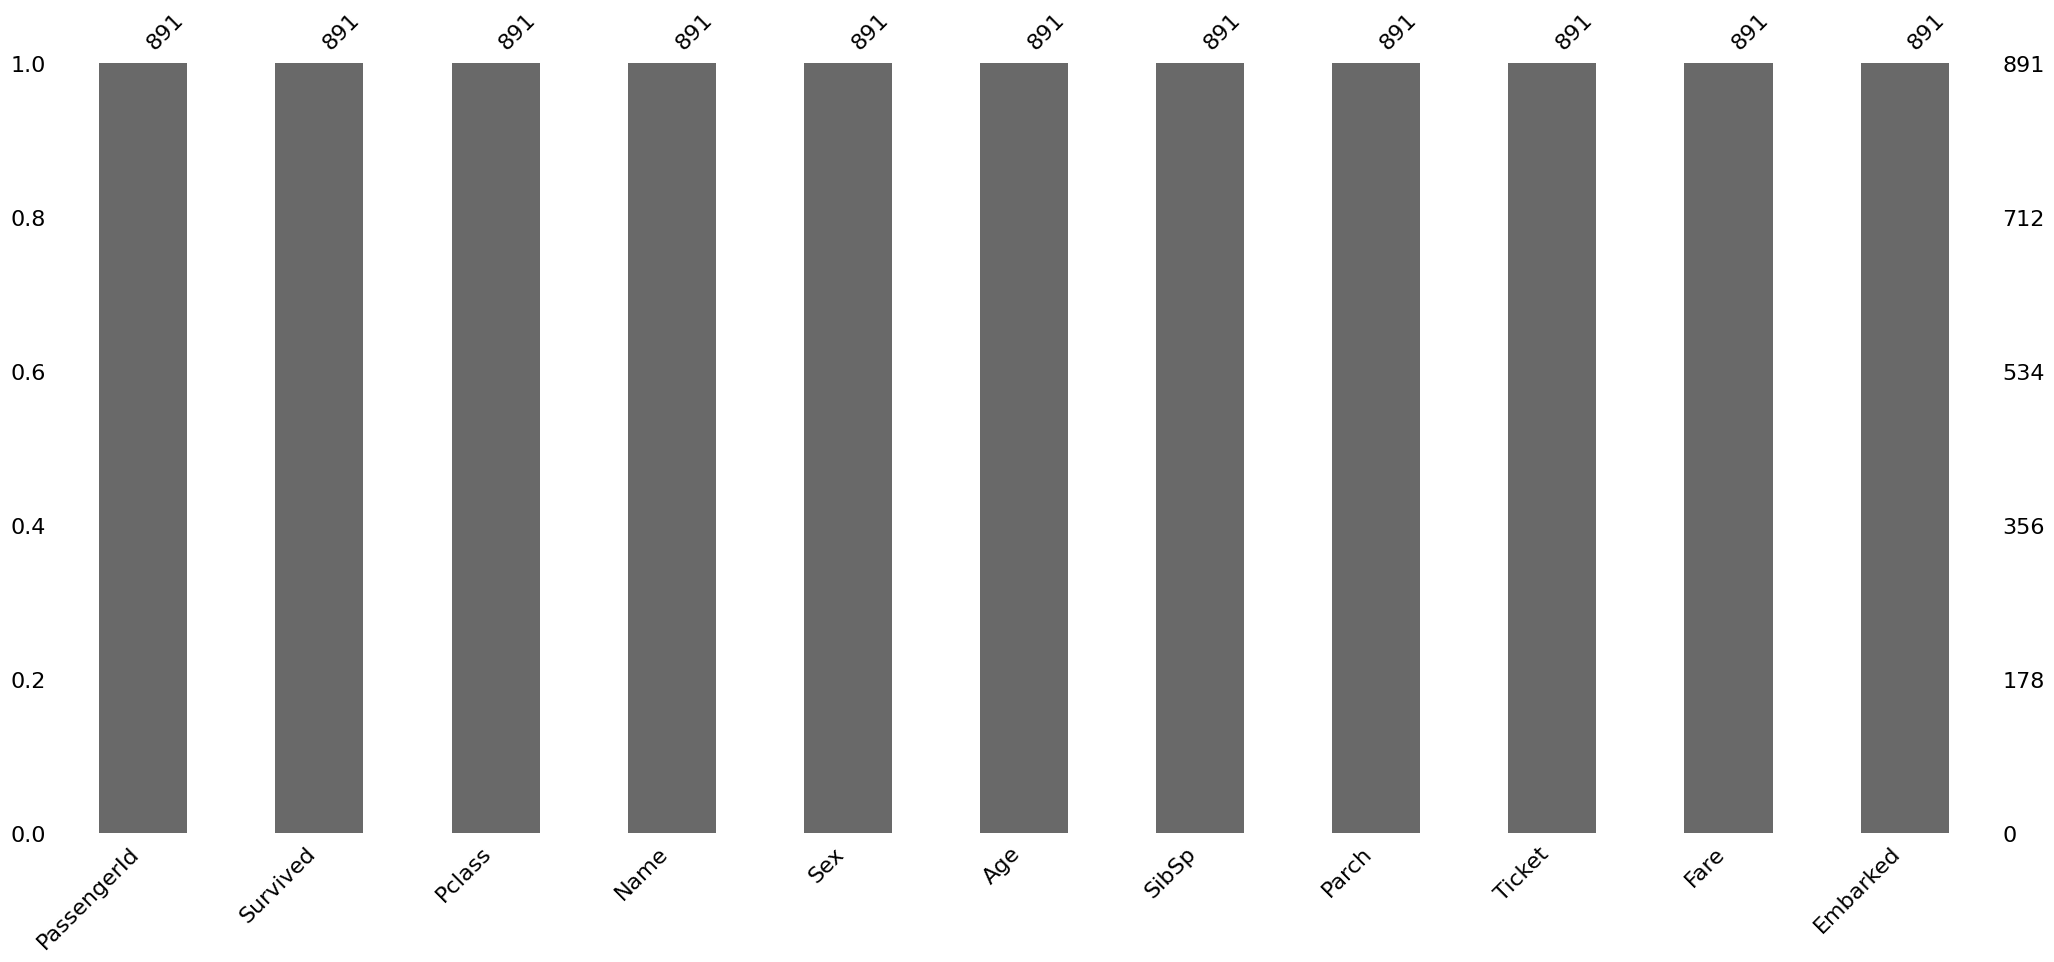

In [14]:
msno.bar(train_df)

# Preprocessing

### Feature Engineering

In [15]:
#dropping the passengerId column because all its values are unique so it won't help any model find any pattern

train_df = train_df.drop(columns=['PassengerId'])

In [16]:
#dropping the Ticket column because most of its values are unique so it won't help any model find any pattern

train_df = train_df.drop(columns=['Ticket'])

In [17]:
#dropping the Name column because all its values are unique so it won't help any model find any pattern

train_df = train_df.drop(columns=['Name'])

In [18]:
#normalizing Age and Fair column because they have high standard deviation

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
subset_df_standardized = scaler.fit_transform(train_df[['Age', 'Fare']])

train_df.loc[train_df[['Age', 'Fare']].index, ['Age', 'Fare']] = subset_df_standardized

In [19]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Survived,891.0,3.838384e-01,0.486592,0.000000,0.000000,0.000000,1.000000,1.000000
Pclass,891.0,2.308642e+00,0.836071,1.000000,2.000000,3.000000,3.000000,3.000000
Age,891.0,2.232906e-16,1.000562,-2.253155,-0.592481,0.000000,0.407926,3.870872
SibSp,891.0,5.230079e-01,1.102743,0.000000,0.000000,0.000000,1.000000,8.000000
Parch,891.0,3.815937e-01,0.806057,0.000000,0.000000,0.000000,0.000000,6.000000
Fare,891.0,3.987333e-18,1.000562,-0.648422,-0.489148,-0.357391,-0.024246,9.667167


In [20]:
# one-hot encoding Sex  and Embarked columns

train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'])

train_df[['Sex_female', 'Sex_male']] = train_df[['Sex_female', 'Sex_male']].astype(int)
train_df[['Embarked_C', 'Embarked_Q', 'Embarked_S']] = train_df[['Embarked_C', 'Embarked_Q', 'Embarked_S']].astype(int)

In [21]:
# splitting data to train and val sets
from sklearn.model_selection import train_test_split

y = train_df.pop('Survived')
x = train_df

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

# Training classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

model = xgb.XGBClassifier()

model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

### Performace Evaluation

In [23]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix

predictions = model.predict(x_test)
accuracy = accuracy_score(y_test, predictions)

print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.8

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        54
           1       0.71      0.83      0.77        36

    accuracy                           0.80        90
   macro avg       0.79      0.81      0.80        90
weighted avg       0.81      0.80      0.80        90



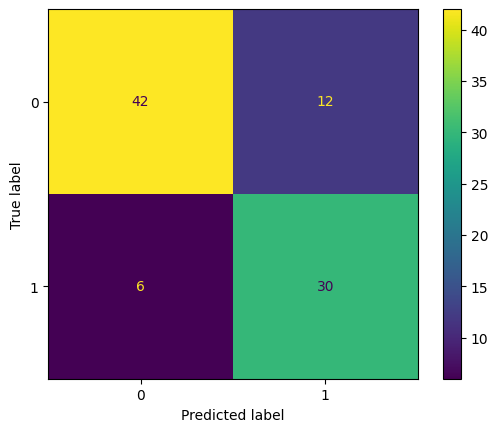

In [24]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot()
plt.show()